In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/customer_churned.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
244,4522-AKYLR,Female,1,No,No,13,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,54.8,731.3,No
5116,4759-TRPLW,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.4,70.4,Yes
4306,2931-SVLTV,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),110.1,4469.1,No
1456,3473-XIIIT,Female,0,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.0,1534.75,Yes
4384,8642-GVWRF,Female,0,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),79.7,165,Yes


In [ ]:
#drop customer ID as it is useless
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#TotalCharges is an object, convert it to float
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
#conversion NOT Possible
#pd.to_numeric(df.TotalCharges)

In [ ]:
#some columns have blank values
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#drop these columns
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [ ]:
#now convert the TotalCharges
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-8-5370fe0201db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.TotalCharges.dtypes

dtype('float64')

In [ ]:
#All the customer's Tenure who didn't left the service
tenure_churn_no = df1[df1.Churn == 'No'].tenure

#All the customer's Tenure who left the service
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

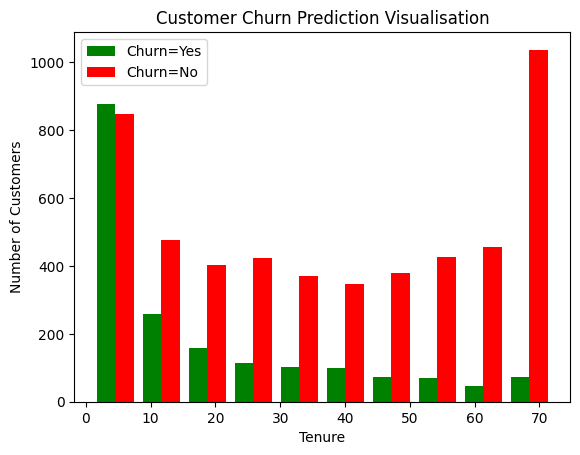

In [ ]:
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'] )
plt.legend()

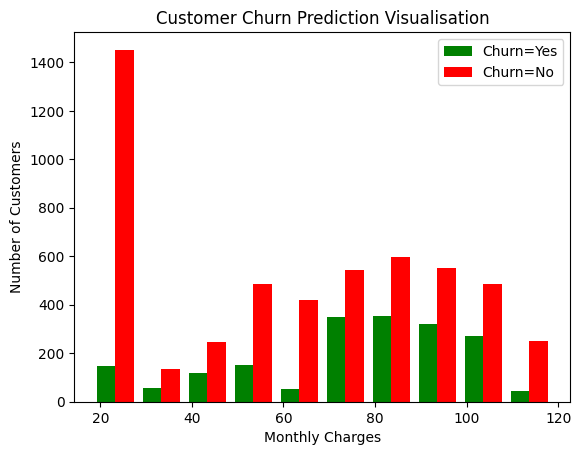

In [ ]:
#All the customer's MC who didn't left the service
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges

#All the customer's MC who left the service
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualisation')

plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'] )
plt.legend()


In [ ]:
#DATA CLEANING

def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column}:  {df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
StreamingTV:  ['No' 'Yes' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


In [ ]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

<ipython-input-15-f205fe68192d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
<ipython-input-15-f205fe68192d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [ ]:
print_unique_col_values(df1)

gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

<ipython-input-17-7c6ac234630e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)


In [ ]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female': 1, 'Male':0}, inplace = True)

<ipython-input-19-ce55e5af4fd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male':0}, inplace = True)


In [ ]:
df1['gender'].unique()

array([1, 0])

In [ ]:
#for making InternetSe
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5233,1,0,1,0,8,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
777,0,0,0,0,2,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6494,1,0,0,1,26,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4399,1,0,0,0,66,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
#scaling all the left columns which have 1> value
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaling all the columns
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6031,1,1,1,1,0.154930,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3394,0,0,0,0,0.352113,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
5934,1,1,1,0,0.352113,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


DATA CLEANING IS DONE


In [ ]:
#SPLIT INTO 
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

CREATING THE ANN MODEL


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
     keras.layers.Dense(20, input_shape=(26,), activation="relu"),
     keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                540       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#training the model
model.fit(X_train, y_train, epochs=50, shuffle=True)

Epoch 1/50
176/176 [==============================] - 3s 4ms/step - loss: 0.5638 - accuracy: 0.6946
Epoch 2/50
176/176 [==============================] - 2s 9ms/step - loss: 0.4464 - accuracy: 0.7780
Epoch 3/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4284 - accuracy: 0.7938
Epoch 4/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4223 - accuracy: 0.7995
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8012
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8062
Epoch 7/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4148 - accuracy: 0.8034
Epoch 8/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4123 - accuracy: 0.8066
Epoch 9/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8064
Epoch 10/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8068

In [ ]:
model.evaluate(X_test, y_test)

yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.24837081],
       [0.51195264],
       [0.00682945],
       [0.6926247 ],
       [0.56857795]], dtype=float32)

In [ ]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [ ]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [ ]:
#NOW CHECK THE ANSWER
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [ ]:
 #PRINT CLASSIFICATION REPORT
 from sklearn.metrics import confusion_matrix, classification_report

 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       999
           1       0.67      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

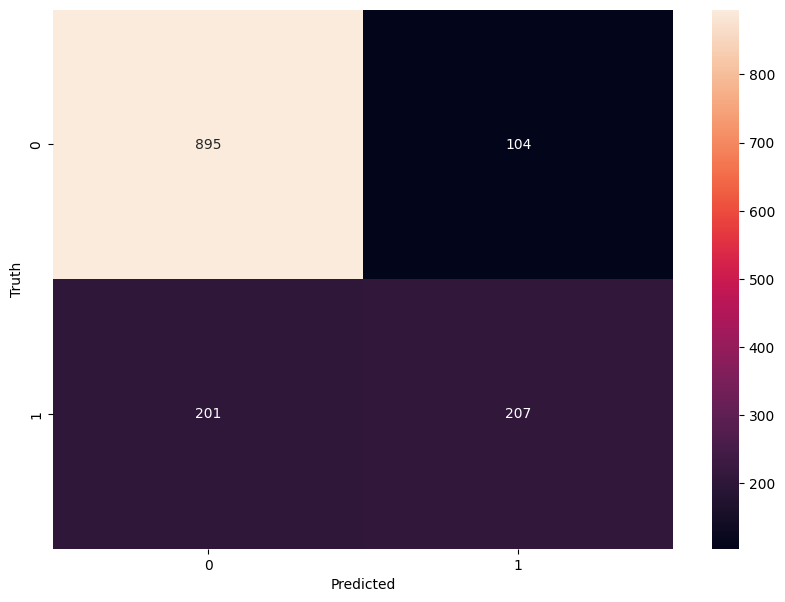

In [ ]:
#Confusion Matrix
import seaborn as sn 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print("Accuracy: ", round((895+219)/(895+219+189+104), 2))

Accuracy:  0.79
